In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
import pm4py
import os
import datetime
log = pm4py.read_xes("../../data/BPI2020.xes")
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='Request For Payment SUBMITTED by EMPLOYEE':
        print("activity: "+act_res[0][0]+" resource: "+act_res[0][1])
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

parsing log, completed traces ::   0%|          | 0/2099 [00:00<?, ?it/s]

activity: Request For Payment SUBMITTED by EMPLOYEE resource: STAFF MEMBER
number of distinct batches: 348
Concurrent batching 348
2017-01-16 09:09:35 to  2017-01-16 09:16:14
2017-01-20 19:49:01 to  2017-01-20 19:51:01
2017-02-03 18:44:59 to  2017-02-03 18:48:06
2017-02-06 15:46:49 to  2017-02-06 15:47:19
2017-02-09 16:40:05 to  2017-02-09 16:58:45
2017-03-01 18:26:25 to  2017-03-01 18:31:41
2017-03-09 10:14:25 to  2017-03-09 10:14:50
2017-03-22 11:21:14 to  2017-03-22 11:33:52
2017-04-06 11:42:32 to  2017-04-06 11:44:26
2017-04-06 15:53:45 to  2017-04-06 16:05:59
2017-04-18 14:03:08 to  2017-04-18 14:05:32
2017-04-25 15:07:28 to  2017-04-25 15:17:30
2017-05-02 08:53:56 to  2017-05-02 08:55:26
2017-05-05 13:04:45 to  2017-05-05 13:19:32
2017-05-08 10:38:59 to  2017-05-08 10:40:58
2017-05-15 11:50:01 to  2017-05-15 11:54:29
2017-05-23 15:36:33 to  2017-05-23 15:43:05
2017-05-24 11:02:56 to  2017-05-24 11:04:12
2017-06-20 11:29:34 to  2017-06-20 11:31:01
2017-06-27 22:02:19 to  2017-06-2

In [5]:
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\bpi2020target.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date'])
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [6]:
targetdatedataframe

,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList
0,2018-01-08,7,0,7,3 days 07:24:42,7,[]
1,2018-01-09,3,0,10,12 days 07:51:58,10,[]
2,2018-01-10,2,0,12,23 days 06:39:48,12,[]
3,2018-01-11,5,0,17,38 days 16:28:10,17,[]
4,2018-01-12,3,0,20,56 days 19:31:10,20,[]
...,...,...,...,...,...,...,...
343,2018-12-17,2,0,11,296 days 19:17:35,11,[]
344,2018-12-18,0,6,5,304 days 13:27:43,11,"['request for payment 12204', 'request for pay..."
345,2018-12-19,0,3,2,124 days 18:53:46,5,"['request for payment 13229', 'request for pay..."
346,2018-12-20,0,1,1,65 days 13:04:09,2,['request for payment 28534']


[5, 15, 50, 55, 70, 75, 80, 85, 95, 105, 120, 140, 150, 155, 170, 175, 180, 200, 250, 280, 300, 325, 348]


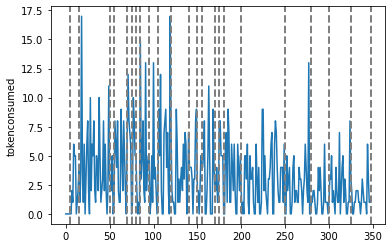

In [7]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

[5, 20, 25, 55, 65, 70, 75, 80, 85, 95, 120, 125, 135, 140, 150, 155, 160, 235, 275, 280, 305, 315, 320, 348]


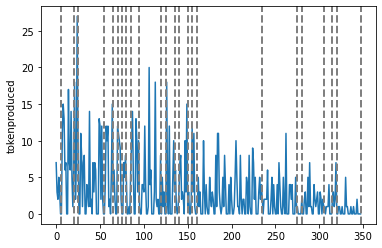

In [8]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


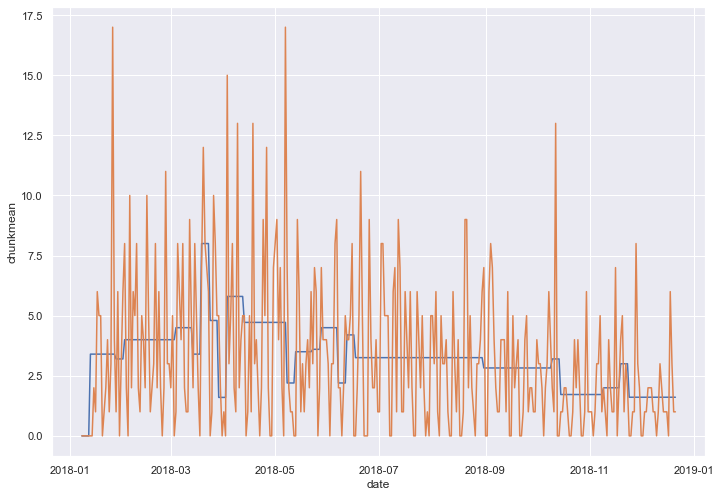

In [13]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [11]:
def categorise(row):   
    if row['chunkmean'] < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

138


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched
9,2018-01-17,13,6,50,196 days 01:20:51,56,"['request for payment 14417', 'request for pay...",3.400000,2,1
10,2018-01-18,6,5,51,214 days 23:01:49,56,"['request for payment 9799', 'request for paym...",3.400000,2,1
11,2018-01-19,7,5,53,234 days 08:25:26,58,"['request for payment 7534', 'request for paym...",3.400000,2,1
15,2018-01-23,7,4,70,445 days 19:19:06,74,"['request for payment 65692', 'request for pay...",3.400000,2,1
18,2018-01-26,5,17,74,636 days 12:39:28,91,"['request for payment 41488', 'request for pay...",3.400000,2,1
...,...,...,...,...,...,...,...,...,...,...
333,2018-12-07,0,2,18,1003 days 18:54:27,20,"['request for payment 50887', 'request for pay...",1.607143,24,1
338,2018-12-12,0,3,13,648 days 15:11:50,16,"['request for payment 25033', 'request for pay...",1.607143,24,1
339,2018-12-13,1,2,12,643 days 03:20:40,14,"['request for payment 23161', 'request for pay...",1.607143,24,1
344,2018-12-18,0,6,5,304 days 13:27:43,11,"['request for payment 12204', 'request for pay...",1.607143,24,1


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


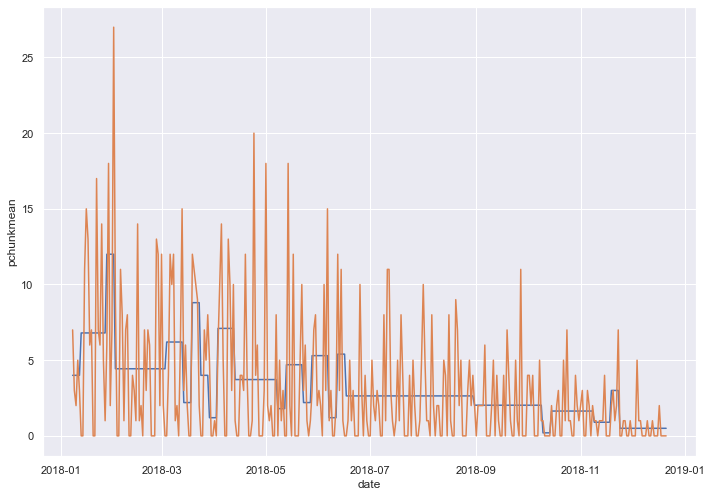

In [12]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenproduced')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [67]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

150


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched,pchunkmean,pchunkindex,pchunkbatched
3,2018-01-11,2,0,5,3 days 06:56:00,5,[],1.063158,1,0,1.033333,1,1
8,2018-01-16,2,0,8,30 days 18:44:00,8,[],1.063158,1,0,1.033333,1,1
10,2018-01-18,3,0,11,45 days 02:46:00,11,[],1.063158,1,0,1.033333,1,1
14,2018-01-22,2,0,13,88 days 08:28:00,13,[],1.063158,1,0,1.033333,1,1
16,2018-01-24,2,0,16,113 days 22:43:00,16,[],1.063158,1,0,1.033333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2018-12-21,3,0,82,2310 days 03:12:00,82,[],0.320000,24,0,1.066667,25,1
354,2018-12-28,2,0,85,2887 days 01:34:00,85,[],0.320000,24,0,1.066667,25,1
357,2018-12-31,2,0,87,3141 days 05:38:00,87,[],0.320000,24,0,0.368421,26,1
364,2019-01-07,2,0,28,739 days 22:04:00,28,[],8.500000,25,0,0.368421,26,1


In [14]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])

df['date']=df['batchingdate'].dt.date
merged.sort_values(by='batchingdate')

348


batchingdate    348
date            210
dtype: int64

In [29]:
pd.set_option('display.max_rows', 380)
merged.sort_values(by='batchingdate')

,batchingdate,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched
137,2017-01-16 09:16:14,2017-01-16,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
186,2017-01-20 19:51:01,2017-01-20,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
292,2017-02-03 18:48:06,2017-02-03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
231,2017-02-06 15:47:19,2017-02-06,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
116,2017-02-09 16:58:45,2017-02-09,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
320,2017-03-01 18:31:41,2017-03-01,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
13,2017-03-09 10:14:50,2017-03-09,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
143,2017-03-22 11:33:52,2017-03-22,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
307,2017-04-06 11:44:26,2017-04-06,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
308,2017-04-06 16:05:59,2017-04-06,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [27]:
merged=pd.merge(df,batcheddf,on='date',how='inner')
merged['date'].nunique()
merged=pd.merge(df,batcheddf,on='date',how='left')
merged['date'].nunique()
merged=pd.merge(df,batcheddf,on='date',how='outer')
merged['date'].nunique()

232

In [ ]:







Pm4Py=232
Statistical tool= 138
Shared= 116


In [9]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date